# 互评作业二：网页浏览行为关联规则挖掘

项目地址 https://github.com/Fourseas54/DM2

## 数据预处理

该数据集为按照一定规则组织的纯文本，此部分从文本中提取数据，并将网站ID转换为对应Vroot字符
每条数据代表一个用户所访问的Vroot组成的集合，提取为数据集的一行

In [ ]:
!pip install mlxtend

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
warnings.filterwarnings('ignore')

In [78]:
f = open("anonymous-msweb.data","r")
lines = f.readlines()
Vroot_dic = {}
data_lst = []
index = -1
for line in lines:
    items = line.split(",")
    if items[0] == "A":
        Vroot_dic[items[1]] = [items[3],0]
    elif items[0] == "C":                 #一个用户数据的开始
        data_lst.append([])                #提取到一个list中
        index += 1
    elif items[0] == "V":  
        root_id = items[1]
        if root_id in list(Vroot_dic.keys()):    #缺失值的处理：丢掉
            Vroot_dic[root_id] = [Vroot_dic[root_id][0],Vroot_dic[root_id][1]+1]
            Vroot = Vroot_dic[root_id][0]
            Vroot = Vroot[1:-1]            #从字典里取出的字符串头尾会被添加引号，去除
            data_lst[index].append(Vroot)
idset = []
for i,x in enumerate(data_lst):
    idset.append(str(i))
data_basket = {}
data_basket["ID"] = idset
data_basket["Page"] = data_lst

data = pd.DataFrame(data_basket)
data

,ID,Page
0,0,"[regwiz, Support Desktop, End User Produced View]"
1,1,"[Support Desktop, Knowledge Base]"
2,2,"[Support Desktop, Knowledge Base, Microsoft.co..."
3,3,[Norway]
4,4,[misc]
...,...,...
32706,32706,"[Free Downloads, Windows NT Server, Windows Fa..."
32707,32707,"[Free Downloads, Internet Development, Germany..."
32708,32708,"[Support Desktop, Knowledge Base]"
32709,32709,"[Windows95 Support, Support Desktop, isapi]"


从文本文件提取后的数据，共有32711条数据
每一行数据代表一个用户的页面访问数据，用列表存储，列表中每一元素为该用户所访问的页面

In [79]:
data_id = data.drop('Page',1)
data_basket = data['Page'].str.join(',')
data_basket = data_basket.str.get_dummies(',')
new_data = data_id.join(data_basket)
new_data

,ID,About Microsoft,Access Development,ActiveX Data Objects,ActiveX Technology Development,Advanced Data Connector,Advanced Technology,Anti Piracy Information,Argentina,Australia,...,mdsn,misc,msdownload.,partner,promo,regwiz,security.,softlib,sports,vbscripts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32706,32706,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32707,32707,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32708,32708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32709,32709,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


上一个代码块将每条数据one-hot方式向量化，即该条数据中若包含该页面，则对应值为1，否则为0

PS：数据比较稀疏

AND！：前面已经做过缺失值的处理，此处只是转化数据格式的需要

## 数据探索性分析以及可视化

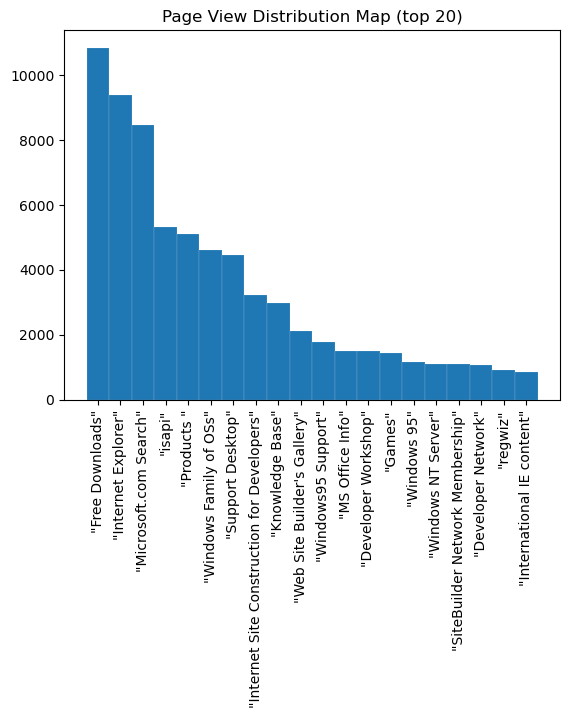

In [62]:
ordered = [ v[1] for v in sorted(Vroot_dic.items(), key=lambda p:p[1][1], reverse = True) ] # 根据页面访问量大小排序，由大到小
name = []
count = []
for x in ordered[:20]:
    name.append(x[0])
    count.append(x[1])
fig, ax = plt.subplots()
ax.bar(name, count,  width = 1,edgecolor="white", linewidth=0.1)
plt.xticks( rotation=90, fontsize=10)
plt.title('Page View Distribution Map (top 20)')
plt.show()
plt.close()

由上图可见，访问量最多的页面是"Free Download"下载页面，这很合理
其他还有"Internet Exploer"IE浏览器相关，"Microsoft Search"搜索页面等，
这类页面访问量多，符合一般认知，结果合理

## FP-tree算法产生频繁项集

In [96]:
class treeNode:
    def __init__(self, nameValue, numOccur, parentNode):
        self.name = nameValue
        self.count = numOccur
        self.nodeLink = None
        self.parent = parentNode
        self.children = {}
 
    def inc(self, numOccur):
        self.count += numOccur
 
    def disp(self, ind=1):
        print ('  '*ind, self.name, ' ', self.count)
        for child in self.children.values():
            child.disp(ind+1)
def updateHeader(nodeToTest, targetNode):
    while nodeToTest.nodeLink != None:
        nodeToTest = nodeToTest.nodeLink
    nodeToTest.nodeLink = targetNode
def updateFPtree(items, inTree, headerTable, count):
    if items[0] in inTree.children:
        # 判断items的第一个结点是否已作为子结点
        inTree.children[items[0]].inc(count)
    else:
        # 创建新的分支
        inTree.children[items[0]] = treeNode(items[0], count, inTree)
        # 更新相应频繁项集的链表，往后添加
        if headerTable[items[0]][1] == None:
            headerTable[items[0]][1] = inTree.children[items[0]]
        else:
            updateHeader(headerTable[items[0]][1], inTree.children[items[0]])
    # 递归
    if len(items) > 1:
        updateFPtree(items[1::], inTree.children[items[0]], headerTable, count)
        
def createFPtree(dataSet, minSup=1):
    headerTable = {}
    for trans in dataSet:
        for item in trans:
            headerTable[item] = headerTable.get(item, 0) + dataSet[trans]
    for k in list(headerTable.keys()):
        if headerTable[k] < 327:
            del(headerTable[k]) # 删除不满足最小支持度的元素
    freqItemSet = set(headerTable.keys()) # 满足最小支持度的频繁项集
    if len(freqItemSet) == 0:
        return None, None
    for k in headerTable:
        headerTable[k] = [headerTable[k], None] # element: [count, node]
 
    retTree = treeNode('Null Set', 1, None)
    for tranSet, count in dataSet.items():
        # dataSet：[element, count]
        localD = {}
        for item in tranSet:
            if item in freqItemSet: # 过滤，只取该样本中满足最小支持度的频繁项
                localD[item] = headerTable[item][0] # element : count
        if len(localD) > 0:
            # 根据全局频数从大到小对单样本排序
            orderedItem = [v[0] for v in sorted(localD.items(), key=lambda p:p[1], reverse=True)]
            # 用过滤且排序后的样本更新树
            updateFPtree(orderedItem, retTree, headerTable, count)
    return retTree, headerTable
def loadSimpDat():
    simDat = data_lst

    return simDat
# 构造成 element : count 的形式
def createInitSet(dataSet):
    retDict={}
    for trans in dataSet:
        key = frozenset(trans)
        if key in retDict.keys():
            retDict[frozenset(trans)] += 1
        else:
            retDict[frozenset(trans)] = 1
    return retDict

# 递归回溯
def ascendFPtree(leafNode, prefixPath):
    if leafNode.parent != None:
        prefixPath.append(leafNode.name)
        ascendFPtree(leafNode.parent, prefixPath)
# 条件模式基
def findPrefixPath(basePat, myHeaderTab):
    treeNode = myHeaderTab[basePat][1] # basePat在FP树中的第一个结点
    condPats = {}
    while treeNode != None:
        prefixPath = []
        ascendFPtree(treeNode, prefixPath) # prefixPath是倒过来的，从treeNode开始到根
        if len(prefixPath) > 1:
            condPats[frozenset(prefixPath[1:])] = treeNode.count # 关联treeNode的计数
        treeNode = treeNode.nodeLink # 下一个basePat结点
    return condPats
def mineFPtree(inTree, headerTable, minSup, preFix, freqItemList):
    # 最开始的频繁项集是headerTable中的各元素

    bigL = [ v[0] for v in sorted(headerTable.items(), key=lambda p:p[0]) ] # 根据频繁项的总频次排序
    for basePat in bigL: # 对每个频繁项
        newFreqSet = preFix.copy()
        newFreqSet.add(basePat)
        freqItemList.append(tuple(newFreqSet))
        condPattBases = findPrefixPath(basePat, headerTable) # 当前频繁项集的条件模式基
        myCondTree, myHead = createFPtree(condPattBases, minSup) # 构造当前频繁项的条件FP树
        if myHead != None:
            # print 'conditional tree for: ', newFreqSet
            # myCondTree.disp(1)
            mineFPtree(myCondTree, myHead, minSup, newFreqSet, freqItemList) # 递归挖掘条件FP树

In [97]:
simpDat = loadSimpDat()
initSet=createInitSet(simpDat)
myFPtree,myHeaderTab=createFPtree(initSet,3)
freqItems=[]
mineFPtree(myFPtree,myHeaderTab,3,set([]),freqItems)
freqItems = tuple(freqItems)
print('频繁项集的大小：',len(freqItems))
freqItems[:20]

频繁项集的大小： 198


(('ActiveX Technology Development',),
 ('Corporate Desktop Evaluation',),
 ('Corporate Desktop Evaluation', 'MS Office Info'),
 ('Corporation Information',),
 ('Developer Network',),
 ('Developer Network', 'Free Downloads'),
 ('Developer Network', 'Microsoft.com Search'),
 ('Developer Workshop',),
 ('Developer Workshop', 'Free Downloads'),
 ('Internet Site Construction for Developers',
  'Developer Workshop',
  'Free Downloads'),
 ('Developer Workshop', 'Internet Explorer'),
 ('Developer Workshop', 'Internet Explorer', 'Free Downloads'),
 ('Internet Site Construction for Developers',
  'Developer Workshop',
  'Internet Explorer'),
 ('Internet Site Construction for Developers', 'Developer Workshop'),
 ('Developer Workshop', 'Microsoft.com Search'),
 ("Web Site Builder's Gallery", 'Developer Workshop'),
 ('End User Produced View',),
 ('Exchange',),
 ('Free Downloads',),
 ('FrontPage',))

由上面数据可知
support，支持度大小设置为327时，(总数32711，约1%)
频繁项集含有198条数据

并输出了其中20条数据作为示范

## Apriori算法产生频繁项集

In [102]:
frequent_itemsets = apriori(new_data.drop('ID',1),min_support=0.01,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.018404,(ActiveX Technology Development)
1,0.023203,(Corporate Desktop Evaluation)
2,0.011158,(Corporation Information)
3,0.033230,(Developer Network)
4,0.045856,(Developer Workshop)
...,...,...
192,0.011372,"(isapi, Knowledge Base, Support Desktop, Free ..."
193,0.020360,"(isapi, Windows95 Support, Windows Family of O..."
194,0.013726,"(isapi, Knowledge Base, Support Desktop, Micro..."
195,0.015347,"(Windows95 Support, isapi, Knowledge Base, Sup..."


由上面数据可知
support，支持度设置为0.01时(百分比模式)
频繁项集含有197条数据
与使用FP-tree时的数据接近，但有误差
原因应该在于FP-tree实现时使用的支持度为整数形式，而总数的1%不是整数，存在误差
并且由输出可知，两种方法的结果有许多重合，因此结果是合理的

## 关联规则挖掘

### 关联规则计算

In [103]:
rules = association_rules(frequent_itemsets,metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Corporate Desktop Evaluation),(MS Office Info),0.023203,0.046040,0.011128,0.479578,10.416659,0.010059,1.833053,0.925474
1,(MS Office Info),(Corporate Desktop Evaluation),0.046040,0.023203,0.011128,0.241700,10.416659,0.010059,1.288140,0.947628
2,(Developer Network),(Free Downloads),0.033230,0.331265,0.010088,0.303588,0.916451,-0.000920,0.960258,-0.086173
3,(Free Downloads),(Developer Network),0.331265,0.033230,0.010088,0.030454,0.916451,-0.000920,0.997136,-0.119971
4,(Developer Network),(Microsoft.com Search),0.033230,0.258720,0.014582,0.438822,1.696127,0.005985,1.320936,0.424529
...,...,...,...,...,...,...,...,...,...,...
597,"(Windows95 Support, Support Desktop)","(isapi, Windows Family of OSs)",0.029592,0.045000,0.010639,0.359504,7.988954,0.009307,1.491032,0.901505
598,(isapi),"(Windows95 Support, Support Desktop, Windows F...",0.162942,0.011984,0.010639,0.065291,5.448285,0.008686,1.057031,0.975388
599,(Windows Family of OSs),"(isapi, Windows95 Support, Support Desktop)",0.141481,0.024243,0.010639,0.075194,3.101748,0.007209,1.055095,0.789268
600,(Windows95 Support),"(isapi, Support Desktop, Windows Family of OSs)",0.054752,0.015591,0.010639,0.194305,12.462561,0.009785,1.221813,0.973036


上面的输出为根据以上得到的频繁项集，得出的关联规则
其中第一列(非index)和第二列代表关联规则，为 antecedents -> consequents
3,4列分别代表关联规则两方的支持度，第5列为关联规则的支持度
第6列为置信度
第7列为提升度

### 评价指标

已经包含在上面输出结果的列中，如支持度，置信度，提升度，conviction，zhangs_metri等